# Python Exam - Group No. 6 - Presentation notebook
___

### Group
Group 6  
- Joakim Stensnæs			cph-js437	cph-js437@cphbusiness.dk
- Henrik Lønquist Thomasen	cph-92ht	cph-ht92@cphbusiness.dk
- Yones El Bana			cph-ye7		cph-ye7@cphbusiness.dk
- Alex Wagner			cph-aw116	cph-aw116@cphbusiness.dk

## Project description


I dette projekt tager vi udgangspunkt i H.M. Dronningens nytårstaler igennem årene 2001 til 2020.  
Vi vil hente talerne fra nettet, bearbejde dem og indentificere statistiske forskelle, samt prøve at angive om der negative eller positive antydninger.  
Vi vil fremvise disse data på betydningsfulde og let læselige måder med grafer.


##### Data:
Dronnings nytårstaler ligger på nettet i transkriberet form.  
https://www.kongehuset.dk/monarkiet-i-danmark/nytarstaler/hendes-majestat-dronningens-nytarstaler

##### Status
Status: Det er lykkedes os, at opfylde alle projektets succeskriterier. I første omgang henter vi talerne ned i transkriberet form.  Vi klargøre og renser efterfølgende talerne ved blandt andet at tokenize, fjerne fyldeord, tegnsætning m.m., for derefter at præsentere data visuelt via wordclouds og plots. Vi foretager en yderligere analyse på talerne, for at få et indtryk om talerne er overvejende positive eller negative og progressionen i de enkelte taler.
##### User guide
User guide: Projektet skal køres i jupyter notebooks i præsentations filen, som tager udgangspunkt i vores importeret moduler, som indeholder alt vores kode og opsætning. 

##### Succeskriterier
1. Data retrieval  
&nbsp;&nbsp;&nbsp;Webscrabing, saving to file/csv.

2. Data preparation  
&nbsp;&nbsp;&nbsp;Analyze speeches, data cleaning, word clouds.

3. Structure analysis  
&nbsp;&nbsp;&nbsp;Recognize patterns, form statistics.

4. Sentiment analysis  
&nbsp;&nbsp;&nbsp;Analyze positive or negative, compare between years and in individual speeches.

5. Data presentation  
&nbsp;&nbsp;&nbsp;Pyplot.


##### Teknologier / libraries
- csv
- pandas
- numpy
- matplotlib
- pyplot
- bs4
- requests
- cv2
- nltk
- Afinn
- Pickle
- Wordcloud

##### Hovedudfordringer
The main challenges bliver helt klart sentiment analysis, da det er relativt nyt stof.

In [ ]:
#Prerequisite installations
!pip install beautifulsoup4
!pip install nltk
!pip install pandas
!pip install sklearn
!pip install wordcloud

___
### Data Retrievel (Webscraping med BeautifulSoup)
I dette afsnit benytter vi os af webscraping til at indhente vores data sæt.  
Det handler om Dronningens nytårstaler fra perioden 2001 til 2020. 

Disse taler ligger alle sammen tilgængelig på følgende side:  
https://www.kongehuset.dk/monarkiet-i-danmark/nytarstaler/hendes-majestat-dronningens-nytarstaler

In [1]:
from modules import data_retrieval

#henter links
data_retrieval.get_links_and_write_to_csv("data/Links.csv")

#vi gemmer links
links = data_retrieval.read_csv_and_add_to_list("data/Links.csv")  

#vi henter dataen fra urlerne.
data_retrieval.write_data_to_files_from_links(links)



data/Nytårstalen 2020
data/Nytårstalen 2019
data/Nytårstalen 2018
data/Nytårstalen 2017
data/Nytårstalen 2016
data/Nytårstalen 2015
data/Nytårstalen 2014
data/Nytårstalen 2013
data/Nytårstalen 2012
data/Nytårstalen 2011
data/Nytårstalen 2010
data/Nytårstalen 2009
data/Nytårstalen 2008
data/Nytårstalen 2007
data/Nytårstalen 2006
data/Nytårstalen 2005
data/Nytårstalen 2004
data/Nytårstalen 2003
data/Nytårstalen 2002
data/Nytårstalen 2001


#### Findings

Vi henter data fra de fundne url'er.

Talerne bliver gemt via en rekursiv metode der gennemløber html elementer.
Dog er der ikke en ens struktur på alle siderne, så yderligere filtrering af talerne er nødvændigt.  
Specifikt for 2012, 13, 14 og 15.

___
### Data Preperation (Klargører data fra talerne )
For at kunne arbejde med talerne som data skal vi både rense dem for 'støj' og tilpasse dem til vores data strukturer.

Data preparation kan både gøres let og tungt, afhængigt af hvor præcist eller sofistikeret data man vil arbejde med.

In [2]:
from modules import data_preparation as dp

#### Stopwords

In [3]:
#Download nltk's stopword bibliotek
dp.download_nltk_stopwords()

#Her oprettes en liste af nltk's default stopwords
stopwords = dp.set_danish_stopwords()

#Her tilføjes gruppens yderligere stopwords
stopwords = dp.add_custom_stopwords(stopwords)

#Her kan man tilføje et stopword(vi indsætter ordet 'abekat')
stopword = "abekat"
stopwords = dp.add_stopword(stopwords,stopword)

print(stopwords)   

['abekat', 'ad', 'af', 'alle', 'alt', 'anden', 'at', 'bare', 'blev', 'blive', 'bliver', 'både', 'da', 'de', 'dem', 'den', 'denne', 'der', 'deres', 'det', 'dette', 'dig', 'din', 'disse', 'dog', 'du', 'efter', 'eller', 'en', 'end', 'er', 'et', 'for', 'fra', 'får', 'går', 'ham', 'han', 'hans', 'har', 'havde', 'have', 'hele', 'hende', 'hendes', 'her', 'hos', 'hun', 'hvad', 'hvis', 'hvor', 'i', 'ikke', 'ind', 'jeg', 'jer', 'jo', 'kan', 'kunne', 'man', 'mange', 'med', 'meget', 'men', 'mig', 'min', 'mine', 'mit', 'mod', 'må', 'ned', 'noget', 'nogle', 'nu', 'når', 'og', 'også', 'om', 'op', 'os', 'over', 'på', 'selv', 'sig', 'sin', 'sine', 'sit', 'skal', 'skulle', 'som', 'så', 'sådan', 'thi', 'til', 'ud', 'under', 'var', 'ved', 'vi', 'vil', 'ville', 'vor', 'være', 'været', 'år']


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Corpus

In [4]:
#Her hentes de rå taler og indsættes i et dictionary
data_dict = dp.create_data_dict()
data_dict

{'2001': 'årene går og i tilbageblikket får hvert af dem sit eget ansigt sommetider er det en begivenhed i familien som gør året mindeværdigt en festdag en barnefødsel eller det år huset blev malet eller det kan være en stor sorg året vil blive husket men det er vort personlige mindeår andre gange er det et år vi alle i danmark vil huske et sportsmesterskab en ny stor bro for eksempel men der er år vi aldrig vil glemme og hvis minde vi deler med millioner af mennesker i hele verden et sådant år vil  være for ingen af os kan holde denne nytårsaften uden at en bestemt dato står mejslet i erindringenda terroren slog midt ned i usa den  september var det ikke blot amerikas forenede stater der blev ramt det var os alle sammen for det anslag føltes som en undsigelse ikke af en enkelt nation men af alle de samfund i verden som forsøger at leve i fred og fordragelighed som med glæde og stolthed udnytter de mange muligheder vor tids viden og teknologi kan give og som arbejder på at opbygge samf

In [5]:
#Her overføres dictionary dataen til et dataframe
data_df = dp.data_dict_to_df(data_dict)
data_df

,speech
2001,årene går og i tilbageblikket får hvert af dem...
2002,det er nytårsaften igen så alt for hurtigt sy...
2003,igen står et nyt år for døren et skudår oven i...
2004,ingen véd hvad et år kan bringe det har vi net...
2005,det er nytårsaften år synger på sit allersids...
2006,ved et årsskifte er det almindeligt at se både...
2007,nytårsaften er et af årets mærkeligste højdepu...
2008,det er årets sidste aften efter julen med dens...
2009,nytårsaften er den aften hvor vi ser tilbage p...
2010,nytårsaften er det skik at se tilbage på året ...


In [6]:
#Dataframen bliver sat op i en matrix
data_dtm = dp.create_dtm(stopwords, data_df)
data_dtm

,aarhus,absalon,accept,adskillige,affaldet,affinde,affødt,afghanistan,afgjort,afgrundemed,...,ønsket,ønskeuddannelse,øre,ører,øresund,ørsted,østersøregionenjeg,øverst,øvrige,øvrigt
2001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2004,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
2008,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2010,0,0,0,1,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0


##### Findings
Det er vigtigt at ens data er renset og ensrettet inden man arbejder med den, for at opnå et ensrettet resultat. Det er grundlaget for al efterfølgende databehandling.

For data preparation er to ting vigtige. Hvad vi renser i dataen og i hvilket format vi opbevarer den.

Dataen kan bearbejdes i mange etapper og ændres løbende, når mere data kommer ind, hvilket gør data preparation til en kontinuerlig process.

___
### Structure analysis
I dette afsnit vil vi se nærmere på ordene som findes i talerne.

Først vil vi finde de top 10 mest brugte ord(som ikke er stop ord).

Dernest vil vi oprette wordclouds, som giver en visuel repræsentation af hvilke ord som er mest hyppige.

In [8]:
!pip install wordcloud
from modules import structure_analysis as stan
from wordcloud import WordCloud

#### Top words

In [9]:
#top 10 ord for hver tale
top10 = 10
top10_dict = stan.top_words_all(top10,data_dtm)
top10_dict

{'2001': [('danmark', 9),
  ('danske', 7),
  ('godt', 7),
  ('véd', 6),
  ('tak', 5),
  ('samfund', 5),
  ('mennesker', 5),
  ('ønsker', 5),
  ('side', 5),
  ('heller', 4)],
 '2002': [('danmark', 7),
  ('nye', 7),
  ('danske', 6),
  ('lande', 5),
  ('især', 4),
  ('europa', 4),
  ('internationale', 4),
  ('forhold', 4),
  ('tak', 4),
  ('indsats', 4)],
 '2003': [('godt', 6),
  ('nytår', 5),
  ('danmark', 5),
  ('tid', 5),
  ('gøre', 4),
  ('måske', 4),
  ('sige', 4),
  ('næsten', 4),
  ('overalt', 4),
  ('ønsker', 4)],
 '2004': [('tid', 8),
  ('samfund', 8),
  ('godt', 7),
  ('ingen', 6),
  ('verden', 6),
  ('gør', 6),
  ('ønsker', 6),
  ('sammen', 5),
  ('lever', 5),
  ('familie', 5)],
 '2005': [('danske', 10),
  ('danmark', 7),
  ('samfund', 6),
  ('andre', 6),
  ('nye', 6),
  ('bog', 6),
  ('godt', 5),
  ('store', 5),
  ('gang', 5),
  ('står', 5)],
 '2006': [('danmark', 10),
  ('nye', 9),
  ('land', 8),
  ('helt', 6),
  ('godt', 6),
  ('sted', 5),
  ('nyt', 5),
  ('aften', 5),
  ('g

In [10]:
#top 10 ord for udvalgt tale
top10_årgang = 2016
top10_2016_dict = stan.top_words_by_year(top10_årgang,top10,data_dtm)
top10_2016_dict

{'2016': [('danske', 12),
  ('vores', 10),
  ('kommer', 8),
  ('andre', 6),
  ('danmark', 6),
  ('gør', 6),
  ('del', 6),
  ('gode', 5),
  ('godt', 5),
  ('lidt', 5)]}

#### Wordclouds

In [11]:
#Opret et wordcloud format
wordcloud = stan.create_wordcloud_format(stopwords)

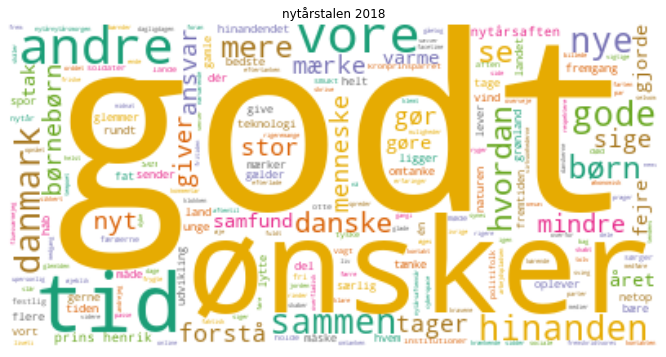

In [12]:
#wordcloud for udvalgt tale
wordcloud_årgang = 2018
stan.create_wordcloud(wordcloud_årgang,wordcloud,data_dict)

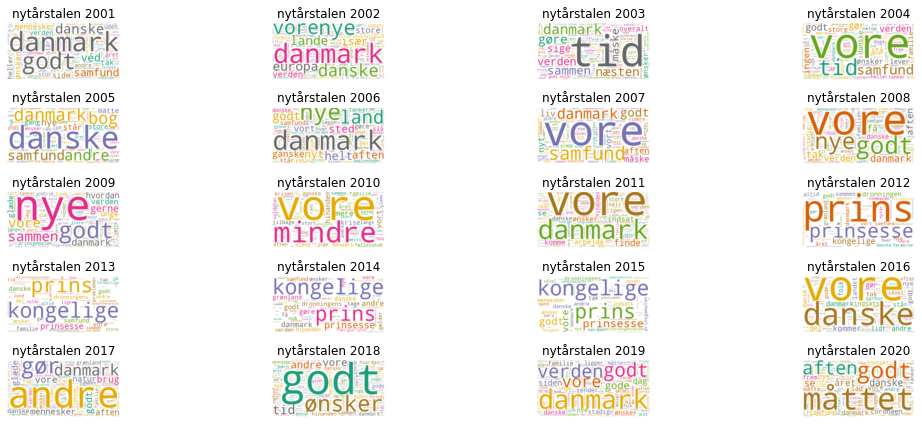

In [13]:
#wordcloud for alle taler
stan.create_wordcloud_all(wordcloud,data_dict)

##### Findings
Det er let at betragte en wordcloud og subjektivt tilføje flere ord til stop-ords listen, for at gøre skyerne endnu mere specifikke.

Det er også interessant at viderebygge på datasættene og lave statistik på forskellige parametre.

I yderste instans vil det være muligt at forudse i en forekommende tale, ikke dennes indhold, men hvilke ord som vil optræde.

___
### Sentiment analysis

Til sentiment analysis benytter vi os af et dansk sentiment library bygget af Finn Årup Nielsen.  
Dette bibliotek giver kun en score, baseret på positiviteten/negativiteten af et ord. Det giver os derfor ingen indsigt i hvorledes en påstand er eksempeltvis subjektiv eller objektiv, ligesom andre sentiment biblioteker gør, så som TextBlob.

Afinn vurdere negativitet/positivitet med en score fra hhv. -5 til +5.

Individuelle sætninger vurderes negativt/positiv med en accumulativ score.
   
Reference:  
Afinn: https://github.com/fnielsen/afinn  
TextBlob: https://github.com/sloria/TextBlob


#### Formål
Ved at lave en sentiment analysis af talerne, kan vi muligvis få en dybere indsigt i hvordan H.M. Dronningens nytårstaler er konstrueret og progressionen af dem.

In [16]:
#%%capture ##Disables output display in notebook
from modules import sentiment_analysis as sa
from modules import Afinn
import pickle
import nltk
nltk.download('punkt')

#vi indlæser vores corpus med pickle
infile = open('data/data_dict.pickle', 'rb')
data_dict = pickle.load(infile)

graded_dict = sa.compile_data(data_dict)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2001 = {1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: -1.0, 6: 2.0, 7: -3.0, 8: 7.0, 9: 1.0, 10: -2.0, 11: 0.0, 12: -2.0, 13: 2.0, 14: 0.0, 15: 0.0, 16: 1.0, 17: 2.0, 18: -2.0, 19: 2.0, 20: 0.0, 21: -4.0, 22: -2.0, 23: -2.0, 24: 0.0, 25: -2.0, 26: 0.0, 27: 0.0, 28: 1.0, 29: 0.0, 30: 2.0, 31: 1.0, 32: 1.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 8.0, 37: 9.0, 38: 2.0, 39: 2.0, 40: 0.0, 41: 7.0, 42: -2.0, 43: 3.0, 44: 3.0, 45: 4.0, 46: -4.0, 47: 2.0, 48: 2.0, 49: 2.0, 50: -2.0, 51: 3.0, 52: 5.0, 53: -2.0, 54: 4.0, 55: 2.0, 56: 10.0, 57: 0.0, 'avg': 1.0701754385964912}
2002 = {1: 0.0, 2: 3.0, 3: 2.0, 4: 0.0, 5: 0.0, 6: 5.0, 7: 0.0, 8: -4.0, 9: 0.0, 10: -3.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 2.0, 17: 0.0, 18: 0.0, 19: 2.0, 20: -2.0, 21: 0.0, 22: 3.0, 23: -3.0, 24: 3.0, 25: 6.0, 26: 0.0, 27: 1.0, 28: 2.0, 29: 3.0, 30: 2.0, 31: 0.0, 32: 3.0, 33: 0.0, 34: 0.0, 35: 1.0, 36: -2.0, 37: -2.0, 38: 4.0, 39: 0.0, 40: -4.0, 41: -2.0, 42: 3.0, 43: 5.0, 44: 6.0, 45: 0.0, 46: 2.0, 47: 3.0, 48: 3.0, 49: 2.0,

2014 = {1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 2.0, 6: 5.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: -3.0, 12: 2.0, 13: 3.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 6.0, 19: 0.0, 20: 0.0, 21: 5.0, 22: 0.0, 23: 1.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 5.0, 29: 0.0, 30: 0.0, 31: 5.0, 32: 5.0, 33: 0.0, 34: -2.0, 35: 0.0, 36: 0.0, 37: 6.0, 38: 0.0, 39: 0.0, 40: 3.0, 41: 2.0, 42: 0.0, 43: 0.0, 44: 6.0, 45: 3.0, 46: -5.0, 47: 2.0, 48: 0.0, 49: 0.0, 50: 2.0, 51: 0.0, 52: -3.0, 53: -2.0, 54: -2.0, 55: -2.0, 56: 1.0, 57: -2.0, 58: 0.0, 59: 2.0, 60: -3.0, 61: 0.0, 62: 7.0, 63: 2.0, 64: -1.0, 65: 3.0, 66: 3.0, 67: 13.0, 68: 0.0, 69: 0.0, 70: 2.0, 71: 1.0, 72: 1.0, 73: 2.0, 74: 0.0, 75: 6.0, 76: -3.0, 77: 2.0, 78: 4.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: -5.0, 84: -2.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: -1.0, 89: -1.0, 90: 3.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: -2.0, 98: 4.0, 99: 7.0, 100: -7.0, 101: 1.0, 102: 0.0, 103: 3.0, 104: 3.0, 105: 0.0, 106: 3.0, 107: 0.0, 108: 0.0, 10

___
#### Talerne sammenlignet
Alle talerne er er overvejende positive, men når vi sammenligner dem kan man se en forskel i talernes sentiment.

For at tjekke om vores sentiment analysis giver mening, kan vi manuelt kigge på den mest positive tale(2004) og den mindst positive(2010).

https://www.kongehuset.dk/menu/materiale/nytarstaler/hendes-majestat-dronningens-nytarstale-2004

https://www.kongehuset.dk/menu/materiale/nytarstaler/hendes-majestat-dronningens-nytarstale-2010

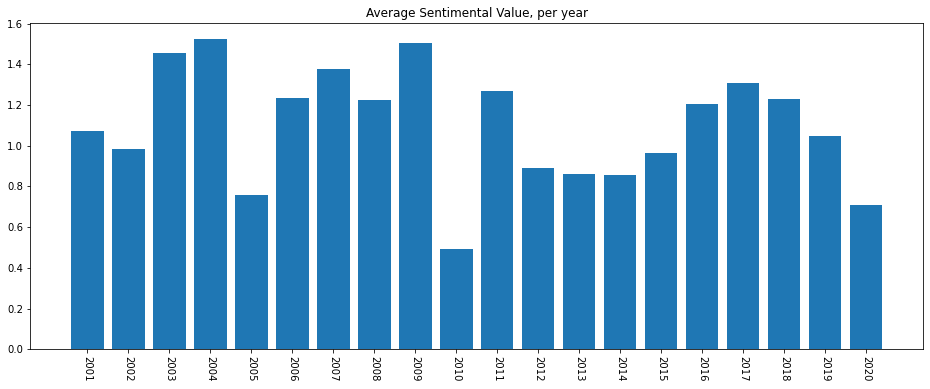

In [17]:
import matplotlib.pyplot as plt

value_dicts = list(graded_dict.values())

averages = []
for dict in value_dicts:
    averages.append(dict['avg'])

    
plt.bar(graded_dict.keys(), averages)
plt.xticks(rotation=270)
plt.title("Average Sentimental Value, per year")
plt.show()

##### Findings
På trods af at talerne alle sammen har en hældende positiv sentiment, er de alle sammen inden for 1.5 point af hinanden.

Vi kan se at der mellem talerne er en forskel i den gennemsnitlige score. Eksempelvis når man sammenligner 2004, med 2010.

___
##### Talerne individuelt

Talerne bliver gennemgået sætning for sætning, for at se nærmere på hvor positiv/negativ talen er og hvordan talerne udvikler sig fra start til slut.  
Baseret på talens udvikling kan man drage paralleler til de emner der bliver talt om på positiv/negativ måde.   

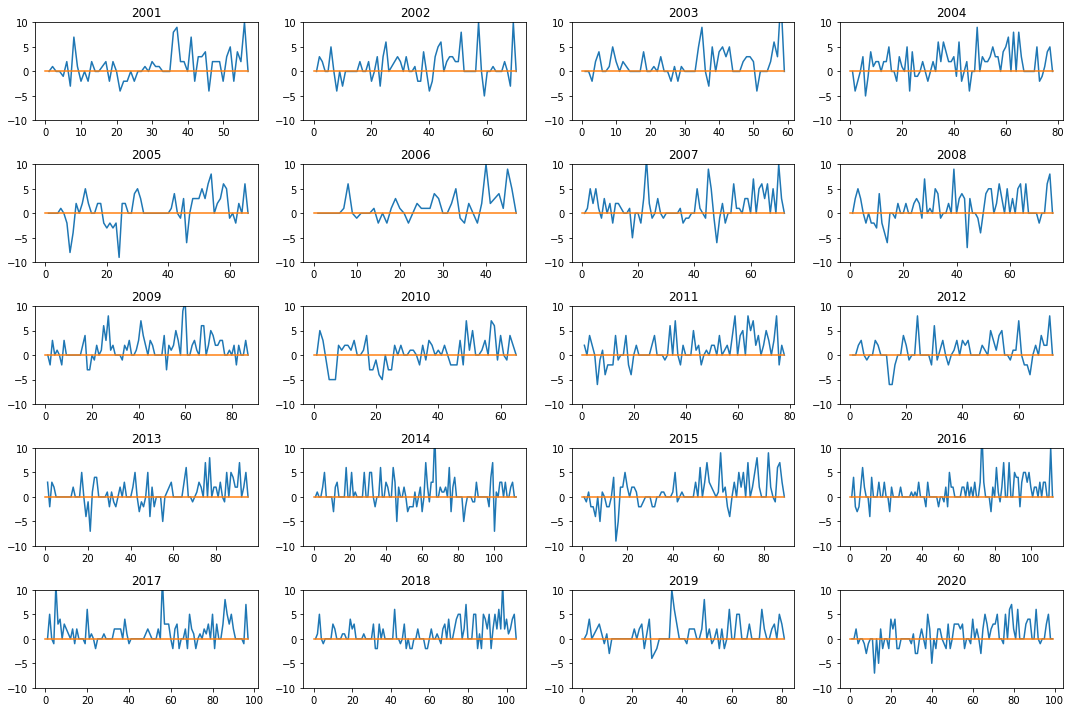

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#talernes sentiement udvikling, sætning for sætning:
fig, ax2 = plt.subplots(figsize=(15,10))
for index, speech in enumerate(value_dicts):
    keys = list(speech.keys())
    values = list(speech.values())
    keys.pop(-1)
    values.pop(-1)
    
    plt.subplot(5, 4, index+1)
    plt.plot(keys, values)
    plt.plot(np.arange(0,len(keys)+1), np.zeros(len(keys)+1))
    plt.title(list(graded_dict.keys())[index])
    plt.ylim(ymin=-10, ymax=10)
    
fig.tight_layout()

#### Findings
Når vi kigger på progressionen af de individuelle taler, er det åbentlyst at en sentiment analysis kan give en indikation om hvorvidt en tekst, tale eller lign. er positiv. Men den tager ikke højde for konteksten. 

Alle talerne har dog det til fældes, at de alle slutter på en række positive sætninger.  
Udover disse pointer, finder vi ikke en særlig stærk sammenhæng mellem talernes indhold, år for år.